In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
doc_path = 'model performance - online - bnci2014001 - both sessions.csv'
df_online = pd.read_csv(doc_path)

In [11]:
df_online.head()

,subject,trial,test_preds,test_value,train_acc,testing_acc
0,1,4,1,1,1.0,1.000000
1,1,5,1,2,1.0,0.500000
2,1,6,2,0,1.0,0.333333
3,1,7,2,3,1.0,0.250000
4,1,8,2,2,1.0,0.400000


c:\Users\abrah\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\abrah\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\abrah\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\abrah\AppData\Local\Programs\Python\Python311\Lib\site-p

(0.0, 300.0)

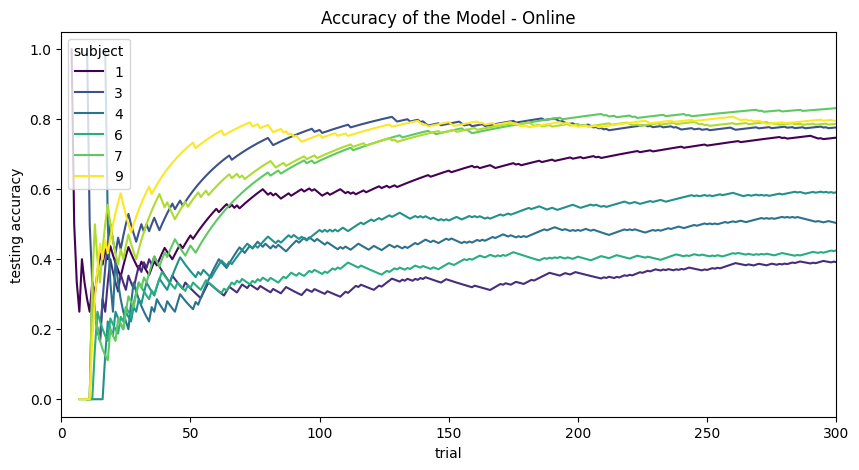

In [12]:
plt.figure(figsize=(10,5))
plt.title('Accuracy of the Model - Online')
sns.lineplot(df_online, x = 'trial', y='testing_acc', hue='subject', palette= 'viridis')
plt.xlabel('trial')
plt.ylabel('testing accuracy')
plt.xlim(0,300)

considering only the last n predictions

In [52]:
df_accuracy = df_online[['subject']].copy()
df_accuracy['correct'] = df_online['test_preds'] == df_online['test_value']
df_accuracy = df_accuracy.groupby('subject').rolling(50, 50).mean().reset_index(level='subject')
df_accuracy['trial'] = df_online['trial']

c:\Users\abrah\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\abrah\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\abrah\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\abrah\AppData\Local\Programs\Python\Python311\Lib\site-p

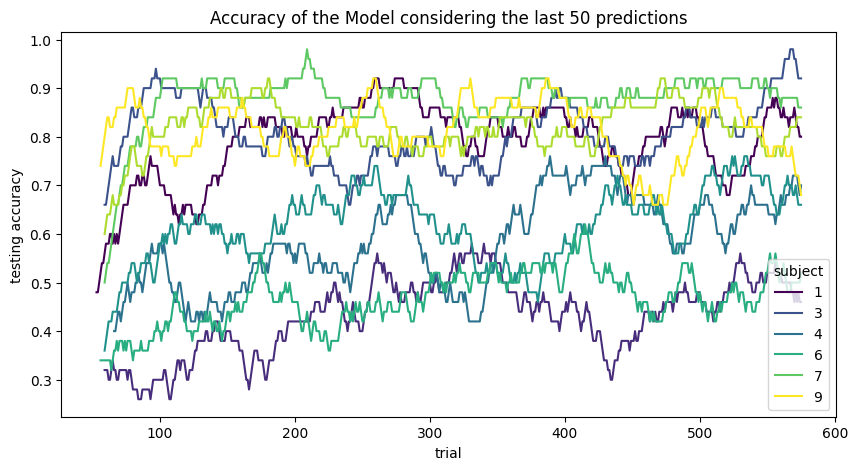

In [54]:
plt.figure(figsize=(10,5))
plt.title('Accuracy of the Model considering the last 50 predictions')
sns.lineplot(df_accuracy, x = 'trial', y='correct', hue='subject', palette= 'viridis')
plt.xlabel('trial')
plt.ylabel('testing accuracy')
#plt.xlim(0,300)
plt.show()